# CCR Spent Catalyst Project RGB Model

In [805]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [806]:
# Loading data
data = pd.read_excel(r'C:\Users\z_ref_analyst1\Desktop\CCR_RGB\rgb_train.xlsx')
data_test = pd.read_excel(r'C:\Users\z_ref_analyst1\Desktop\CCR_RGB\rgb_test.xlsx')

Exploring data

In [807]:
data.head()

,Unnamed: 0,R,G,B,files,Output
0,0,39.386395,60.637308,99.176090,1,4.72
1,89,39.755751,61.402310,97.545430,2,5.00
2,100,34.663902,54.561331,89.876727,3,4.00
3,111,32.929105,52.404347,88.846493,4,4.10
4,122,28.764084,45.207244,80.498675,5,4.90


In [808]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [809]:
data_test.head()

,Unnamed: 0,R,G,B,files,Output
0,0,43.215264,68.630852,107.170540,1,5.50
1,11,29.928928,47.253651,78.826548,2,5.50
2,22,61.111677,74.561360,106.207226,3,4.90
3,33,42.752580,65.469310,104.866738,4,6.20
4,44,68.603470,82.668675,105.895303,5,6.24


In [810]:
#data.drop('Unnamed: 1',axis=1, inplace=True)

In [811]:
len(data)

177

C:\Users\z_ref_analyst1\AppData\Local\Temp\ipykernel_25220\3667092856.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, bins = 10)


<AxesSubplot:ylabel='Density'>

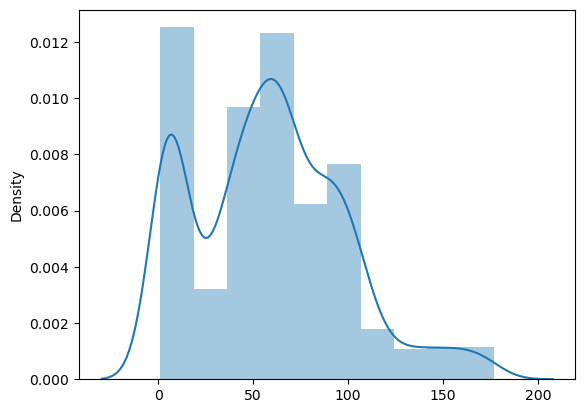

In [812]:
sns.distplot(data, bins = 10)

<AxesSubplot:>

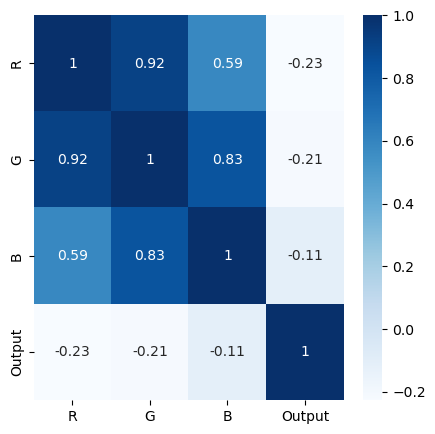

In [813]:
data_plot = data.drop('files', axis=1)
corrmat = data_plot.corr()
plt.figure(figsize = (5, 5))
sns.heatmap(corrmat, annot = True, cmap = 'Blues')

In [814]:
data_test.head()

,Unnamed: 0,R,G,B,files,Output
0,0,43.215264,68.630852,107.170540,1,5.50
1,11,29.928928,47.253651,78.826548,2,5.50
2,22,61.111677,74.561360,106.207226,3,4.90
3,33,42.752580,65.469310,104.866738,4,6.20
4,44,68.603470,82.668675,105.895303,5,6.24


In [815]:
data_test.drop(['Unnamed: 0', 'files'], axis = 1, inplace=True)

In [816]:
len(data_test)

67

In [817]:
data_test.head()

,R,G,B,Output
0,43.215264,68.630852,107.170540,5.50
1,29.928928,47.253651,78.826548,5.50
2,61.111677,74.561360,106.207226,4.90
3,42.752580,65.469310,104.866738,6.20
4,68.603470,82.668675,105.895303,6.24


In [818]:
data.drop('files', axis = 1, inplace=True)

### Using Simple Linear Regression Model

In [819]:
model_lr = LinearRegression() # Linear Regression model
#scaler = StandardScaler() # Standard scalar
normalizer = MinMaxScaler()

In [820]:
# Creatig dependent and independent variables
X = data.drop(['Output'], axis = 1)
y = data['Output']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)

# Normalizing Data
#X_train = normalizer.fit_transform(X_train) 
#X_test = normalizer.transform(X_test)

# Standardizing Data
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [821]:
# Training Model
lr_reg = model_lr.fit(X_train, y_train)

In [822]:
# Predecting values
pred_lr = lr_reg.predict(X_test)
pred_lr # Predicted values

array([5.44437799, 5.95333234, 5.54991205, 5.50164639, 5.96674145,
       5.85383383, 5.51350149, 5.78199803, 6.1501309 , 5.78517226,
       5.69106917, 5.67132502, 5.35534729, 5.84804914, 5.80053052,
       5.71868496, 5.91065896, 5.72349887])

In [823]:
len(X_train)

159

In [824]:
len(y_train)

159

In [825]:
model_lr = LinearRegression() # Linear Regression model
scaler = StandardScaler() # Standard scalar
normalizer = MinMaxScaler()

#Feature scaling is one of the most important data preprocessing step in machine learning. 
# Algorithms that compute the distance between the features are biased towards numerically larger values if the data is not scaled.
# Normalization or Min-Max Scaling:
# Normalization or Min-Max Scaling is used to transform features to be on a similar scale. The new point is calculated as: X_new = (X - X_min)/(X_max - X_min)
# This scales the range to [0, 1] or sometimes [-1, 1]. 
# Geometrically speaking, transformation squishes the n-dimensional data into an n-dimensional unit hypercube.
# Normalization is useful when there are no outliers as it cannot cope up with them. 
# Usually, we would scale age and not incomes because only a few people have high incomes but the age is close to uniform.


# Standardization or Z-Score Normalization:
# Standardization or Z-Score Normalization is the transformation of features by subtracting from mean and dividing by standard deviation. This is often called as Z-score.
# X_new = (X - mean)/Std

# Standardization can be helpful in cases where the data follows a Gaussian distribution. 
# However, this does not have to be necessarily true. 
# Geometrically speaking, it translates the data to the mean vector of original data to the origin and squishes or expands the points if std is 1 respectively. 
# We can see that we are just changing mean and standard deviation to a standard normal distribution which is still normal thus the shape of the distribution is not affected.

# Standardization does not get affected by outliers because there is no predefined range of transformed features.


#Difference between Normalization and Standardization

# Sr.NO.	# Normalization	                                                                       # Standardization
# 1.	# Minimum and maximum value of features are used                                           # for scaling Mean and standard deviation is used for scaling.
# 2.	# It is used when features are of different scales.  	                               # It is used when we want to ensure zero mean and unit standard deviation.
# 3.	# Scales values between [0, 1] or [-1, 1].	                                         # It is not bounded to a certain range.
# 4.	# It is really affected by outliers.	                                                   # It is much less affected by outliers.
# 5.	# Scikit-Learn provides a transformer called MinMaxScaler for Normalization.	           # Scikit-Learn provides a transformer called StandardScaler for standardization.
# 6.	# This transformation squishes the n-dimensional data into an n-dimensional unit hypercube.# It translates the data to the mean vector of original data to the origin and squishes or expands.
# 7.	# It is useful when we don’t know about the distribution	                               # It is useful when the feature distribution is Normal or Gaussian.
# 8.	# It is a often called as Scaling Normalization	                                         # It is a often called as Z-Score Normalization.

In [826]:
# Creatig dependent and independent variables
X = data.drop(['Output'], axis = 1)
y = data['Output']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)

# Standardizing Data
#X_train = scaler.fit_transform(X_train) 
#X_test = scaler.transform(X_test)

# Normalizing data
X_train = normalizer.fit_transform(X_train) 
X_test = normalizer.transform(X_test)

# Training Model
lr_reg = model_lr.fit(X_train, y_train)

In [827]:
# Predecting values on training dataset
pred_lr_tr = lr_reg.predict(X_test)
pred_lr_tr # Predicted values
# Predecting values on test_dataset
X_test_new = data_test.drop(['Output'], axis = 1)
#X_test_new_scaled = scaler.transform(X_test_new) # Standardizing data
X_test_new_scaled = normalizer.transform(X_test_new)
pred_lr_ts = lr_reg.predict(X_test_new_scaled) # Predecting output values
y_actual = data_test['Output']

In [828]:
len(X_train), len(y_train)

(159, 159)

In [829]:
# R2_score on training dataset
r2score_lr_ts = r2_score( y_actual, pred_lr_ts)
# R2_score on training dataset
r2score_lr_tr = r2_score(y_test, pred_lr_tr)
print('R2 Score of training dataset:', r2score_lr_tr, '\n', 'R2 Score of testing dataset:' , r2score_lr_ts )

R2 Score of training dataset: 0.2322155533725453 
 R2 Score of testing dataset: -0.3568324468252315


In [830]:
# Calculating Root mean square error on training dataset
mse_tr = mean_squared_error(y_test, pred_lr_tr)
rmse_tr =np.sqrt(mse_tr)
# Calculating Root mean square error on test dataset
mse_ts = mean_squared_error(pred_lr_ts, y_actual)
rmse_ts =np.sqrt(mse_ts)
print('Test RMSE:', rmse_ts, '\n' , 'Training RMSE:', rmse_tr)


Test RMSE: 0.9431781022268367 
 Training RMSE: 1.0106141670573512


In [831]:
# Predecting values on test_dataset
X_test_new = data_test.drop(['Output'], axis = 1)
X_test_new_scaled = normalizer.transform(X_test_new) # Normalizing data
#X_test_new_scaled = scaler.transform(X_test_new) # Standardizing data
pred_lr = lr_reg.predict(X_test_new_scaled) # Predecting output values
y_actual = data_test['Output']


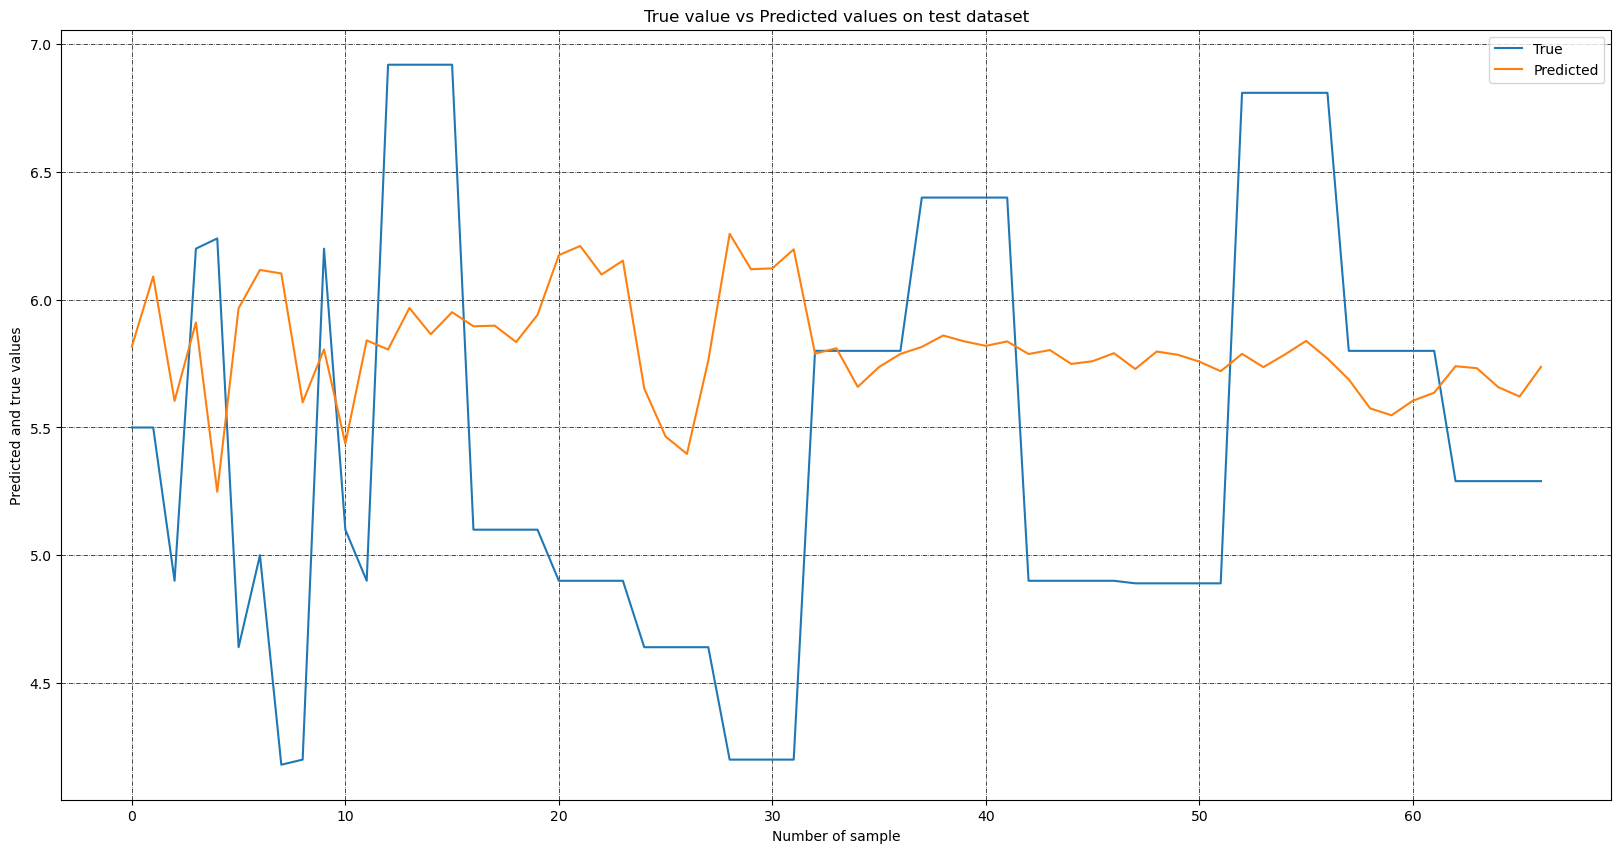

In [832]:
plt.figure(figsize=(20, 10))
plt.title('True value vs Predicted values on test dataset')
plt.xlabel('Number of sample')
plt.ylabel('Predicted and true values')
plt.plot(y_actual)
plt.plot(pred_lr)
plt.grid(True, color = "black", linewidth = "0.5", linestyle = "-.")
plt.legend(['True', 'Predicted'], loc = 1)
plt.show()

In [833]:
# Calculating Root mean square error on test dataset
mse = mean_squared_error(pred_lr, y_actual)
rmse =np.sqrt(mse)
rmse

0.9431781022268367

In [834]:
# R2_score on testing dataset
r2score_lr = r2_score( y_actual, pred_lr)
r2score_lr

-0.3568324468252315

### Using Random Forest

In [835]:
model_rf = RandomForestRegressor() # Random Forest Regressor Model
rf_reg = model_rf.fit(X_train, y_train) # Training Model
pred_rf_val = rf_reg.predict(X_test) # Predecting Output
pred_rf_test = rf_reg.predict(X_test_new_scaled) # Predecting Output


In [836]:
# Calculating Root mean square error
mse_tr = mean_squared_error(y_test, pred_rf_val)
rmse_tr =np.sqrt(mse_tr)

# Calculating Root mean square error
mse_ts = mean_squared_error(y_actual, pred_rf_test)
rmse_ts =np.sqrt(mse_ts)
print('Test RMSE:', rmse_ts, '\n' , 'Training RMSE:', rmse_tr)

Test RMSE: 0.7672175742699443 
 Training RMSE: 1.0719490778742962


In [837]:
# R2_score on training dataset
r2score_lr_tr = r2_score( y_test, pred_rf_val)

# R2_score on test dataset
r2score_lr_ts = r2_score( y_actual, pred_rf_test)

print('R2 Score of training dataset:', r2score_lr_tr, '\n', 'R2 Score of testing dataset:' , r2score_lr_ts )

R2 Score of training dataset: 0.13619272731828846 
 R2 Score of testing dataset: 0.10220767765928196


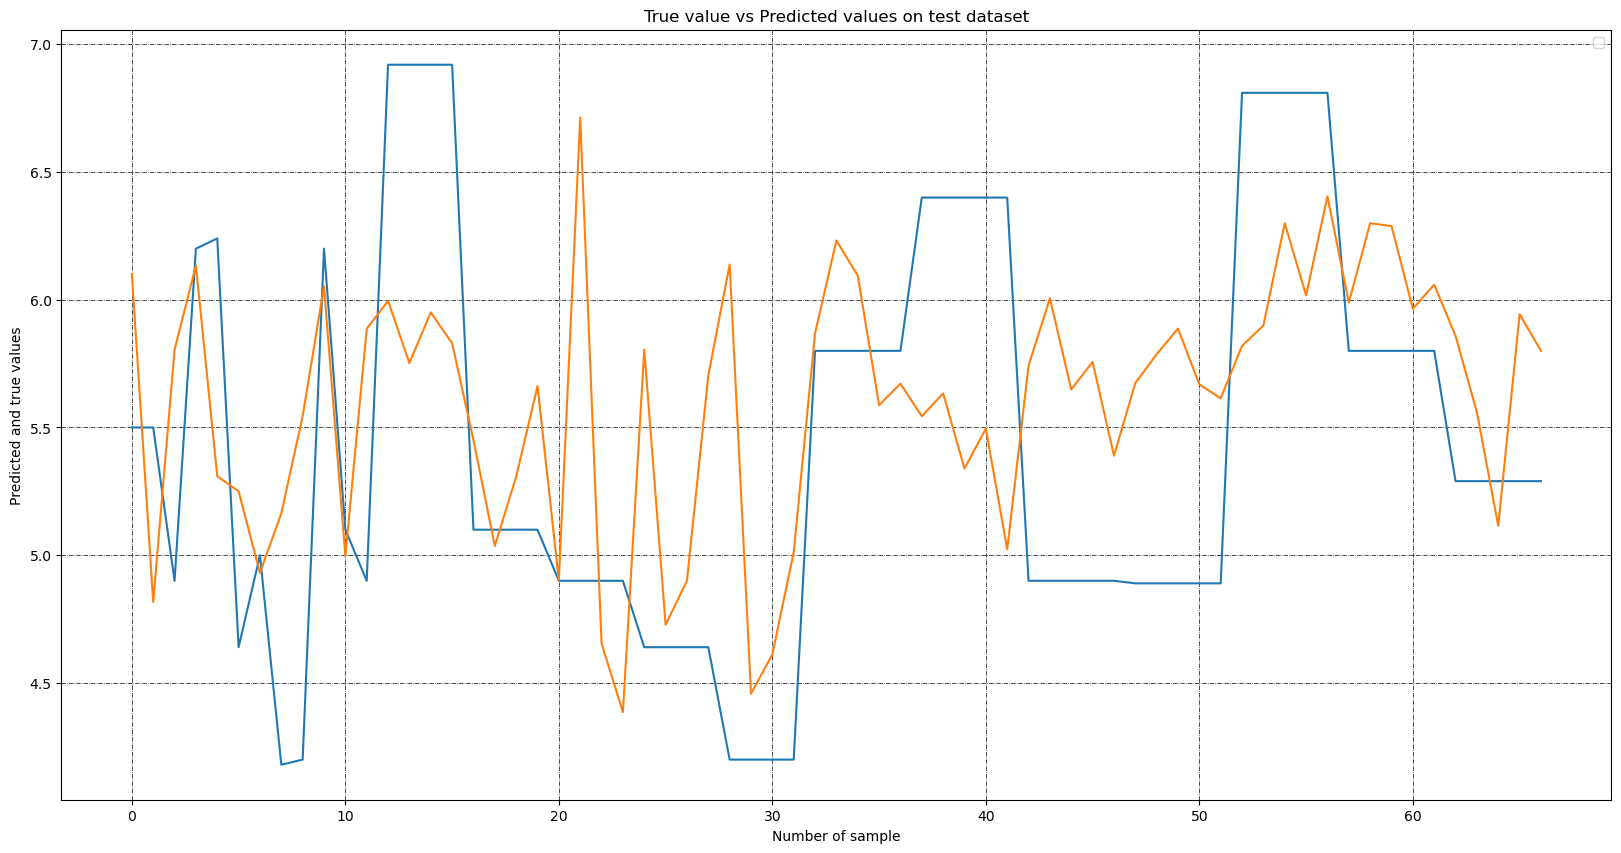

In [838]:
plt.figure(figsize=(20, 10))
plt.title('True value vs Predicted values on test dataset')
plt.xlabel('Number of sample')
plt.ylabel('Predicted and true values')
plt.grid(True, color = "black", linewidth = "0.5", linestyle = "-.")
plt.legend(['True', 'Predicted'], loc = 1)

plt.plot(y_actual)
plt.plot(pred_rf_test)
plt.show()